In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)

# Below, t is a table; x and y are column indices or labels.

def correlation(t, x, y):
    """The correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) -slope(t, x, y) * np.mean(t.column(x))

def fitted_values(t, x, y):
    """The fitted values along the regression line."""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [3]:
#galton = Table.read_table('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/galton.csv')
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
)

In [4]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [5]:
heights = heights.with_columns('Fitted', fitted_values(heights, 0, 1))
heights

MidParent,Child,Fitted
75.43,73.2,70.7124
75.43,69.2,70.7124
75.43,69,70.7124
75.43,69,70.7124
73.66,73.5,69.5842
73.66,72.5,69.5842
73.66,65.5,69.5842
73.66,65.5,69.5842
72.06,71,68.5645
72.06,68,68.5645


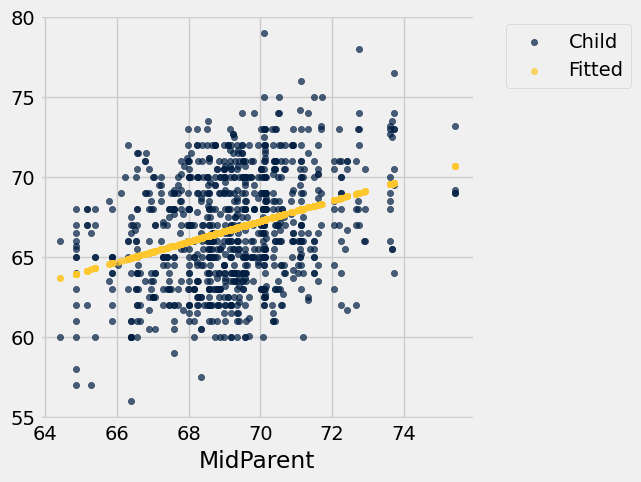

In [6]:
heights.scatter(0)

In [7]:
def residuals(t, x, y):
    return t.column(y) - fitted_values(t, x, y)

In [8]:
heights = heights.with_columns('Residual', residuals(heights, 'MidParent', 'Child'))
heights

MidParent,Child,Fitted,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


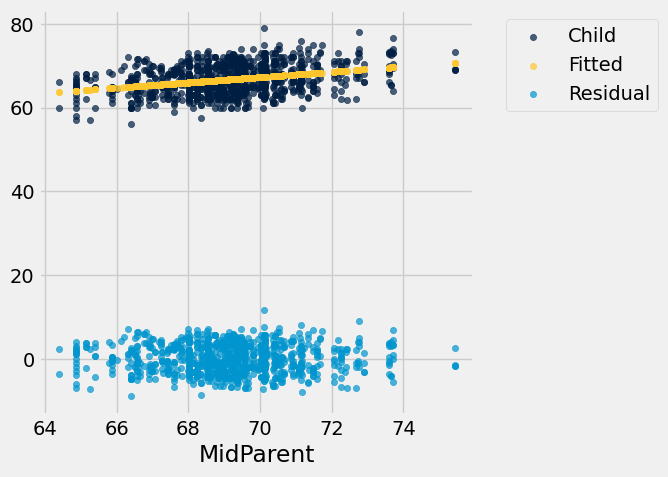

In [9]:
heights.scatter(0)

In [10]:
def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

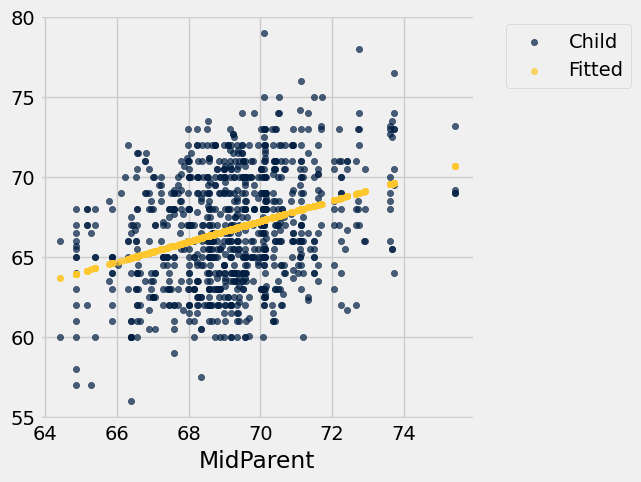

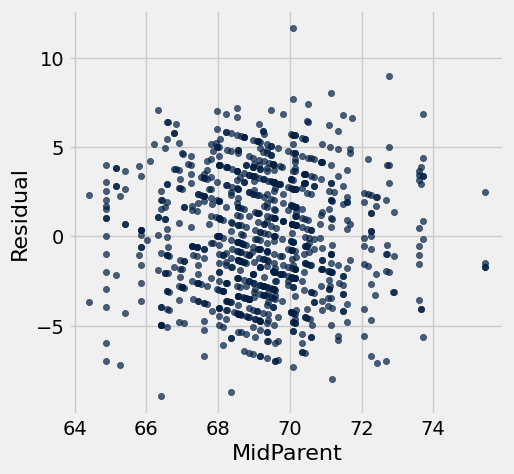

In [11]:
plot_residuals(heights, 'MidParent', 'Child')

## Regression Diagnostics

In [12]:
dugong = Table.read_table('dugongs.csv')
dugong.show()

Age,Length
1,1.8
1.5,1.85
1.5,1.87
1.5,1.77
2.5,2.02
4,2.27
5,2.15
5,2.26
7,2.35
8,2.47


In [13]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

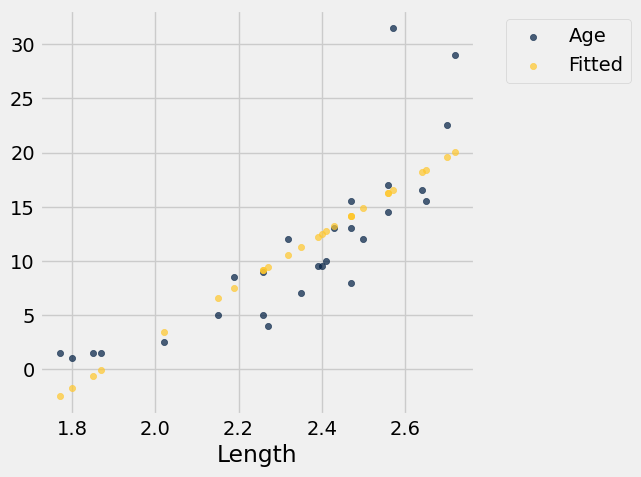

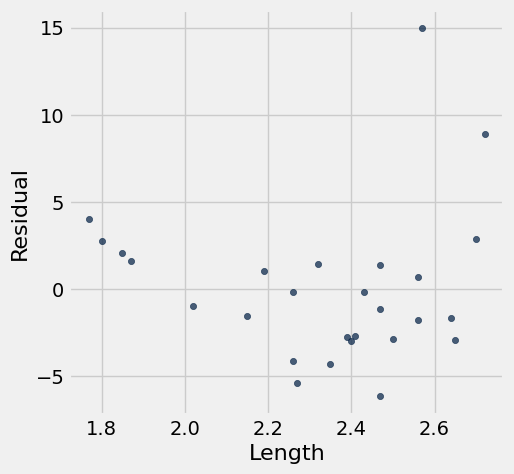

In [14]:
plot_residuals(dugong, 'Length', 'Age')

In [15]:
height_vs_average_weight = Table.read_table('us_women.csv')

In [16]:
height_vs_average_weight

height,ave weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


In [17]:
correlation(height_vs_average_weight, 0, 1)

0.99549476778421608

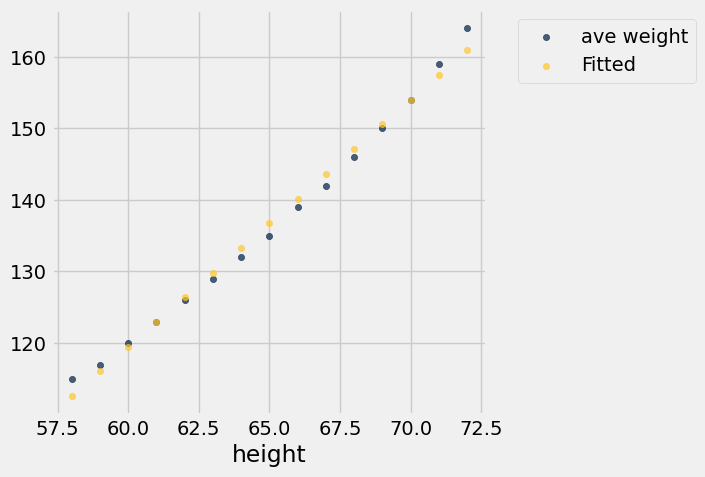

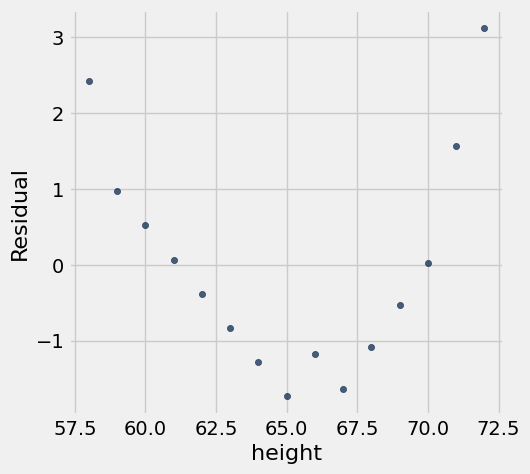

In [18]:
plot_residuals(height_vs_average_weight, 0, 1)

#### A Measure of Clustering

In [19]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

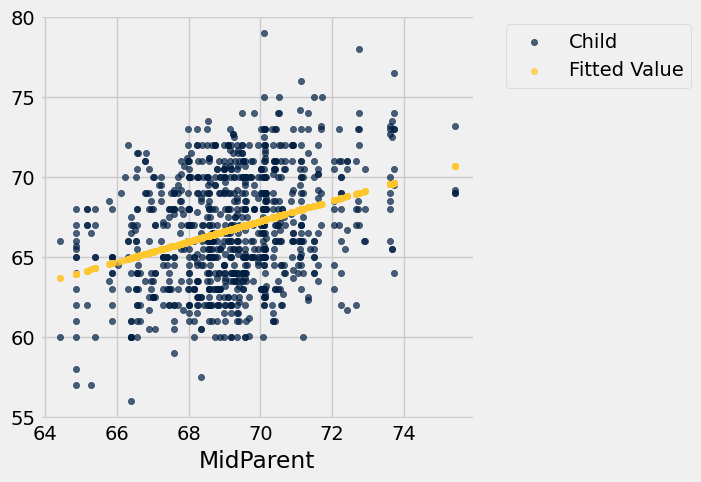

In [20]:
plot_fitted(heights, 'MidParent', 'Child')

In [21]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [22]:
np.var(fitted_values(heights, 'MidParent', 'Child')) / np.var(heights.column('Child'))

0.10300883578346642

In [23]:
correlation(heights, 'MidParent', 'Child') ** 2

0.10300883578346624

In [24]:
np.std(fitted_values(heights, 'MidParent', 'Child')) / np.std(heights.column('Child'))

0.32094989606395957

In [25]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

In [26]:
np.std(fitted_values(dugong, 0, 1)) / np.std(dugong.column(1))

0.82964745549057151

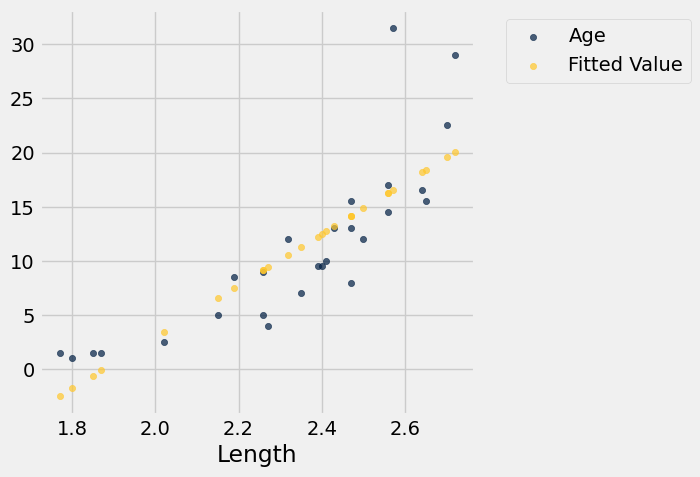

In [27]:
plot_fitted(dugong, 'Length', 'Age')

In [28]:
hybrid = Table.read_table('hybrid.csv')

In [29]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


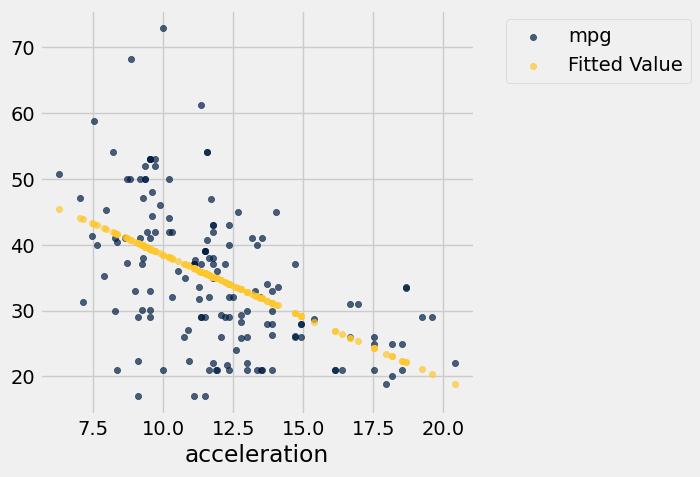

In [30]:
plot_fitted(hybrid, 'acceleration', 'mpg')

In [31]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [32]:
np.std(fitted_values(hybrid, 3, 4)) / np.std(hybrid.column(4))

0.5060703843771186

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of y. The fraction is |r|.

$$
\frac{\text{SD of fitted values}}{\text{SD of }y} = |r| ~~~~~~~~~~~ \text{That is, SD of fitted values} = |r| \cdot \text{SD of }y
$$


## SD of the Residuals

No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of `y`. The fraction is $\sqrt{1 - r^2}$.

$$\text{SD of residuals} = \sqrt{1 - r^2} \cdot \text{SD of }y$$

In [33]:
np.std(residuals(heights, 'MidParent', 'Child'))

3.3880799163953426

In [34]:
r = correlation(heights, 'MidParent', 'Child')
r

0.32094989606395924

In [35]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.3880799163953421

In [36]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

9.4327368334302903

In [37]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [38]:
np.sqrt(1 - r**2) * np.std(hybrid.column('mpg'))

9.4327368334302903